# 编程练习6：支持向量机
## 1 支持向量机
### 1.1 数据样例1
这里我们先将样例数据1画出来，然后用线性支持向量机求解，并比较C=1和C=100的区别。

In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import PredefinedSplit, GridSearchCV

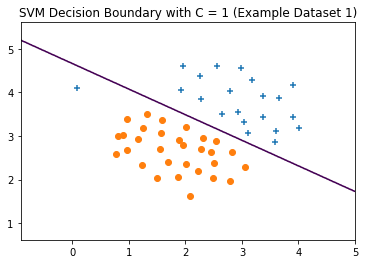

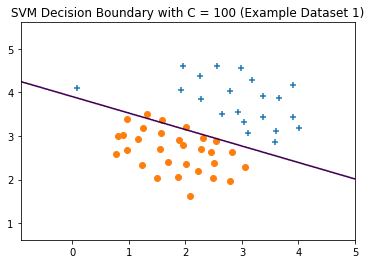

In [30]:
raw_data = loadmat('ex6data1.mat')
df = pd.DataFrame(np.column_stack([raw_data['X'], raw_data['y']]))
pos = df[df[2]==1]
neg = df[df[2]==0]
X = pd.DataFrame(raw_data['X'])
y = np.array(raw_data['y']).flatten()
x1,x2 = np.meshgrid(np.arange(X[0].min()-1,X[0].max()+1,0.01), np.arange(X[1].min()-1,X[1].max()+1,0.01))
lsvc = LinearSVC(C=1.0)
lsvc.fit(X, y)
z = lsvc.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
fig,ax = plt.subplots()
ax.scatter(pos[0], pos[1], marker='+')
ax.scatter(neg[0], neg[1], marker='o')
ax.contour(x1, x2, z, 1)
plt.title('SVM Decision Boundary with C = 1 (Example Dataset 1)')
plt.show()
lsvc = LinearSVC(C=100.0)
lsvc.fit(X, y)
z = lsvc.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
fig,ax = plt.subplots()
ax.scatter(pos[0], pos[1], marker='+')
ax.scatter(neg[0], neg[1], marker='o')
ax.contour(x1, x2, z, 1)
plt.title('SVM Decision Boundary with C = 100 (Example Dataset 1)')
plt.show()

### 1.2 高斯核函数支持向量机
### 1.2.2 数据样例2
数据样例2不是线性可分，使用高斯核函数可以得到一个非线性的分类器。

In [72]:
def sigma2gamma(sigma):
    return 0.5 / np.multiply(sigma, sigma)
def gamma2sigma(gamma):
    return np.sqrt(0.5/gamma)

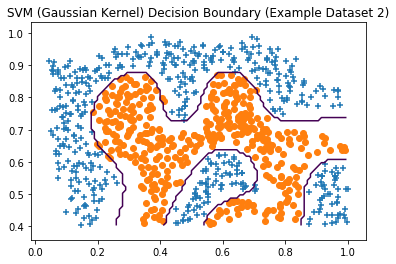

In [73]:
raw_data = loadmat('ex6data2.mat')
df = pd.DataFrame(np.column_stack([raw_data['X'], raw_data['y']]))
pos = df[df[2]==1]
neg = df[df[2]==0]
X = pd.DataFrame(raw_data['X'])
y = np.array(raw_data['y']).flatten()
x1,x2 = np.meshgrid(np.arange(X[0].min(),X[0].max(),0.01), np.arange(X[1].min(),X[1].max(),0.01))
svc = SVC(gamma=sigma2gamma(0.1))
svc.fit(X, y)
z = svc.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
fig,ax = plt.subplots()
ax.scatter(pos[0], pos[1], marker='+')
ax.scatter(neg[0], neg[1], marker='o')
ax.contour(x1, x2, z, 1)
plt.title('SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)')
plt.show()

### 1.2.3 数据样例3
数据样例3里面，我们会搜寻最适宜的C和sigma。scikit-learn里已经自带这个功能：GridSearch  
GridSearch需要划分验证集和训练集，而我们是已经划分好的。所以需要用PredefinedSplit。  
经测试，划分多个验证集好像无法得到正确值，所以最后把所有验证样本放到一个验证集里。

最佳参数：C=1.0 sigma=0.1，得分：0.96


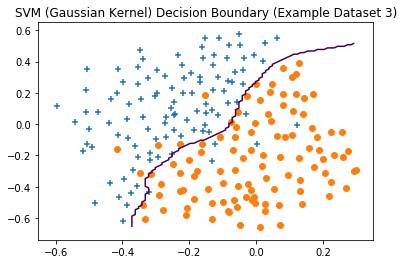

In [79]:
raw_data = loadmat('ex6data3.mat')
df = pd.DataFrame(np.column_stack([raw_data['X'], raw_data['y']]))
pos = df[df[2]==1]
neg = df[df[2]==0]
Xall = np.vstack([raw_data['Xval'], raw_data['X']])
yall = np.vstack([raw_data['yval'], raw_data['y']]).flatten()
test_fold = [0]*len(raw_data['yval']) + [-1]*len(raw_data['y'])
X = pd.DataFrame(raw_data['X'])
y = np.array(raw_data['y']).flatten()
x1,x2 = np.meshgrid(np.arange(X[0].min(),X[0].max(),0.01), np.arange(X[1].min(),X[1].max(),0.01))
C_range = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
gamma_range = sigma2gamma(C_range)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = PredefinedSplit(test_fold)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(Xall, yall)
C = grid.best_params_['C']
sigma = gamma2sigma(grid.best_params_['gamma'])
print('最佳参数：C=%s sigma=%s，得分：%0.2f' % (C, sigma, grid.best_score_))
z = grid.best_estimator_.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
fig,ax = plt.subplots()
ax.scatter(pos[0], pos[1], marker='+')
ax.scatter(neg[0], neg[1], marker='o')
ax.contour(x1, x2, z, 1)
plt.title('SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')
plt.show()